In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [10]:
df = pd.read_csv('churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [11]:
df.shape

(10000, 50)

In [12]:
#Set result rows and columns
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)


#Removing irrelevant columns and columns with more than 5 categorical levels
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job','Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis = 1)
df

,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,Urban,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,Urban,1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,Urban,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,Suburban,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,Suburban,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,3,23,55723.74,Married,Male,No,9.415935,12,2,0,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601
9996,Rural,4,48,34129.34,Divorced,Male,No,6.740547,15,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810
9997,Rural,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799
9998,Urban,1,39,16667.58,Separated,Male,No,12.071910,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.624000,6468.456752


In [13]:
df.isna().values.any()

False

In [14]:
df.isnull().values.any()

False

In [15]:
#getting dummies for columns with more than 2 categorical variables and dropping 1
pd.get_dummies(df['Area']).head()

,Rural,Suburban,Urban
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [16]:
#dummies for Area with Rural if both values are 0
area_pd = pd.get_dummies(df['Area'], dtype=np.int64).iloc[:,1:]
area_pd.head()

,Suburban,Urban
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [17]:
#getting dummies for columns with more than 2 categorical variables and dropping 1
pd.get_dummies(df['Marital']).head()

,Divorced,Married,Never Married,Separated,Widowed
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [18]:
#dummies for Marital with Widowed if all 4 values are 0
marital_pd = pd.get_dummies(df['Marital'], dtype=np.int64).iloc[:,:4]
marital_pd.head()

,Divorced,Married,Never Married,Separated
0,0,0,0,0
1,0,1,0,0
2,0,0,0,0
3,0,1,0,0
4,0,0,0,1


In [19]:
#getting dummies for columns with more than 2 categorical variables and dropping 1
pd.get_dummies(df['Gender']).head()

,Female,Male,Nonbinary
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [20]:
#dummies for Gender with Nonbinary if both values are 0
gender_pd = pd.get_dummies(df['Gender'], dtype=np.int64).iloc[:,:2]
gender_pd.head()

,Female,Male
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1


In [21]:
#getting dummies for columns with more than 2 categorical variables and dropping 1
pd.get_dummies(df['Contract']).head()

,Month-to-month,One year,Two Year
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0


In [22]:
#dummies for Contract with Month-to-Month if both values are 0
contract_pd = pd.get_dummies(df['Contract'], dtype=np.int64).iloc[:,1:]
contract_pd.head()

,One year,Two Year
0,1,0
1,0,0
2,0,1
3,0,1
4,0,0


In [23]:
#getting dummies for columns with more than 2 categorical variables and dropping 1
pd.get_dummies(df['InternetService']).head()

,DSL,Fiber Optic,None
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


In [24]:
#dummies for InternetService with None if both values are 0
internet_pd = pd.get_dummies(df['InternetService'], dtype=np.int64).iloc[:,:2]
internet_pd.head()

,DSL,Fiber Optic
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [25]:
#getting dummies for columns with more than 2 categorical variables and dropping 1
pd.get_dummies(df['PaymentMethod']).head()

,Bank Transfer(automatic),Credit Card (automatic),Electronic Check,Mailed Check
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


In [26]:
#dummies for PaymentMethod with Bank Transfer if all 3 values are 0
payment_pd = pd.get_dummies(df['PaymentMethod'], dtype=np.int64).iloc[:,1:]
payment_pd.head()

,Credit Card (automatic),Electronic Check,Mailed Check
0,1,0,0
1,0,0,0
2,1,0,0
3,0,0,1
4,0,0,1


In [27]:
initial_df = pd.concat([df, area_pd, marital_pd, gender_pd, contract_pd, internet_pd, payment_pd], axis=1)
concat_df = initial_df.drop(['Area', 'Marital', 'Gender', 'Contract', 'InternetService', 'PaymentMethod'], axis = 1)
concat_df.head()

,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Suburban,Urban,Divorced,Married,Never Married,Separated,Female,Male,One year,Two Year,DSL,Fiber Optic,Credit Card (automatic),Electronic Check,Mailed Check
0,0,68,28561.99,No,7.978323,10,0,1,No,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,6.795513,172.455519,904.536110,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0
1,1,27,21704.77,Yes,11.699080,12,0,1,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,1.156681,242.632554,800.982766,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
2,4,50,9609.57,No,10.752800,9,0,1,Yes,Yes,No,Yes,Yes,No,No,No,No,No,Yes,Yes,15.754144,159.947583,2054.706961,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0
3,1,48,18925.23,No,14.913540,15,2,0,Yes,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,17.087227,119.956840,2164.579412,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1
4,0,83,40074.19,Yes,8.147417,16,2,1,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,1.670972,149.948316,271.493436,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1


In [28]:
final_df = pd.get_dummies(concat_df, dtype=np.int64, drop_first=True)
final_df.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Suburban,Urban,Divorced,Married,Never Married,Separated,Female,Male,One year,Two Year,DSL,Fiber Optic,Credit Card (automatic),Electronic Check,Mailed Check,Churn_Yes,Techie_Yes,Port_modem_Yes,Tablet_Yes,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
0,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,1,0,0,0,1,1,1
2,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,1,1
3,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0


In [29]:
final_df.dtypes

Children                     int64
Age                          int64
Income                     float64
Outage_sec_perweek         float64
Email                        int64
Contacts                     int64
Yearly_equip_failure         int64
Tenure                     float64
MonthlyCharge              float64
Bandwidth_GB_Year          float64
Suburban                     int64
Urban                        int64
Divorced                     int64
Married                      int64
Never Married                int64
Separated                    int64
Female                       int64
Male                         int64
One year                     int64
Two Year                     int64
DSL                          int64
Fiber Optic                  int64
Credit Card (automatic)      int64
Electronic Check             int64
Mailed Check                 int64
Churn_Yes                    int64
Techie_Yes                   int64
Port_modem_Yes               int64
Tablet_Yes          

In [30]:
final_df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Suburban,Urban,Divorced,Married,Never Married,Separated,Female,Male,One year,Two Year,DSL,Fiber Optic,Credit Card (automatic),Electronic Check,Mailed Check,Churn_Yes,Techie_Yes,Port_modem_Yes,Tablet_Yes,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,0.334600,0.332700,0.209200,0.191100,0.195600,0.201400,0.502500,0.474400,0.210200,0.244200,0.346300,0.440800,0.208300,0.339800,0.22900,0.265000,0.167900,0.483400,0.299100,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,0.471874,0.471204,0.406758,0.393187,0.396682,0.401066,0.500019,0.499369,0.407471,0.429633,0.475814,0.496508,0.406113,0.473665,0.42021,0.441355,0.373796,0.499749,0.457887,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


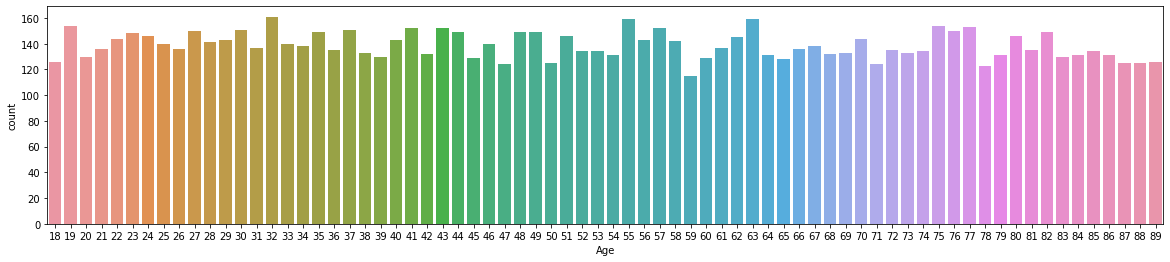

In [31]:
#univirate plot
plt.figure(figsize=(20,4))
sns.countplot(df.Age)

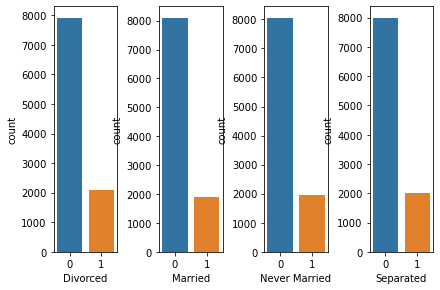

In [32]:
#univirate plot of all marriage variables except Widowed
fig, ax = plt.subplots(1,4)
fig.tight_layout()
sns.countplot(final_df['Divorced'], ax=ax[0])
sns.countplot(final_df['Married'], ax=ax[1])
sns.countplot(final_df['Never Married'], ax=ax[2])
sns.countplot(final_df['Separated'], ax=ax[3])

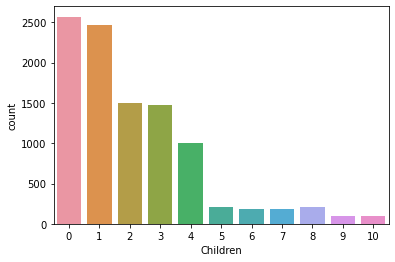

In [33]:
#univirate plot
sns.countplot(final_df.Children)

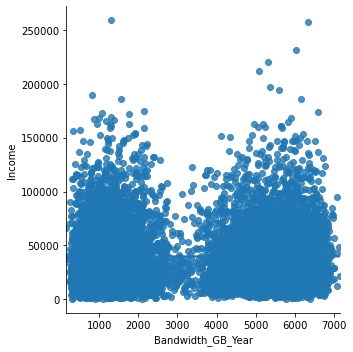

In [34]:
#bivariate plot
sns.lmplot(x='Bandwidth_GB_Year', y='Income', data=final_df)

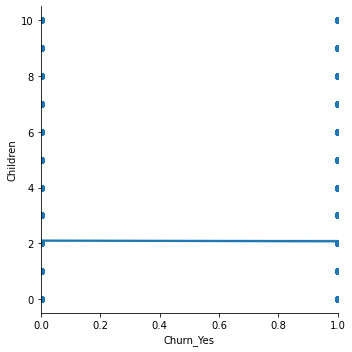

In [35]:
#bivariate plot
sns.lmplot(x='Churn_Yes', y='Children', data=final_df)

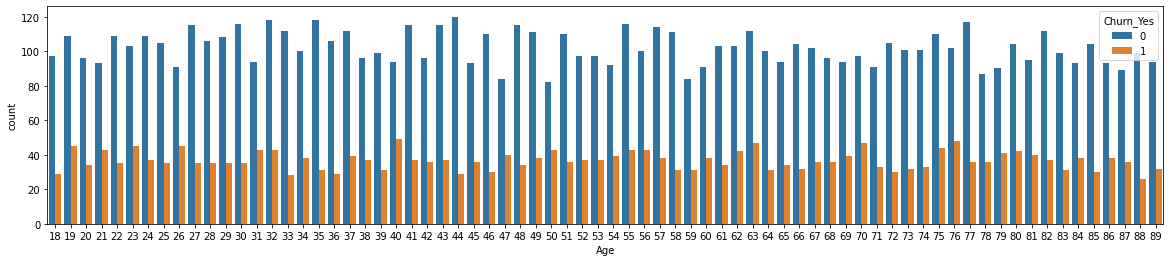

In [36]:
#bivariate plot
plt.figure(figsize=(20,4))
sns.countplot(x='Age', hue='Churn_Yes', data=final_df)

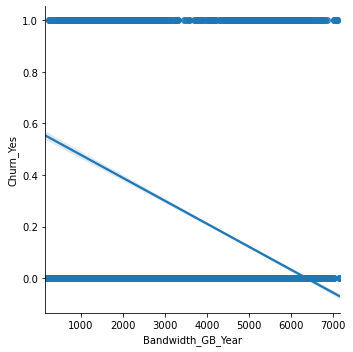

In [37]:
sns.lmplot(x='Bandwidth_GB_Year', y='Churn_Yes', data=final_df)

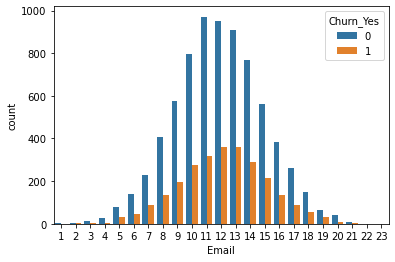

In [38]:
sns.countplot(x= 'Email', hue='Churn_Yes', data=final_df )

In [39]:
#saves our dataframe into a csv file named final_log_churn_clean
final_df.to_csv('final_log_churn_clean.csv')

In [40]:
#initial logistic regression model

initial_x = final_df.drop('Churn_Yes', axis = 1)
initial_y = final_df[['Churn_Yes']]

# split it into test and train variables with 20% for test
X_train, X_test, y_train, y_test = train_test_split(initial_x, initial_y, test_size=0.20, random_state=1)

# create a Linear Regression model object
initial_regression_model = LogisticRegression(max_iter=500)

# pass through the X_train & y_train data set
initial_regression_model.fit(X_train, y_train.values.ravel())


LogisticRegression(max_iter=500)

In [41]:
#define our input and add the constant
X1 = sm.add_constant(initial_x)

#create our initial Logit model
logit = sm.Logit(initial_y, initial_x)

#fit the data
result = logit.fit()

#print the data
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.221485
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9963
Method:                           MLE   Df Model:                           36
Date:                Mon, 13 Sep 2021   Pseudo R-squ.:                  0.6170
Time:                        23:49:59   Log-Likelihood:                -2214.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Children                   -0.7715      0.109     -7.089      0.000      -0.985   

In [42]:
corr = final_df.corr()
display(corr)

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Suburban,Urban,Divorced,Married,Never Married,Separated,Female,Male,One year,Two Year,DSL,Fiber Optic,Credit Card (automatic),Electronic Check,Mailed Check,Churn_Yes,Techie_Yes,Port_modem_Yes,Tablet_Yes,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
Children,1.000000,-0.029732,0.009942,0.001889,0.004479,-0.020776,0.007321,-0.005091,-0.009781,0.025585,-0.003597,-0.005019,-0.002687,0.005260,-0.002647,0.000508,-0.005840,0.005125,0.011277,0.017653,-0.003006,-0.003150,0.005771,0.003441,-0.003750,-0.004264,-0.006884,0.011283,0.001494,-0.001629,-0.021969,0.006937,-0.000297,0.005477,0.000878,-0.007106,0.003461,0.006828
Age,-0.029732,1.000000,-0.004091,-0.008047,0.001588,0.015068,0.008577,0.016979,0.010729,-0.014724,0.005045,0.007641,0.011237,-0.005491,0.005879,-0.006444,0.000416,0.005332,-0.005215,-0.007326,-0.004534,0.001240,-0.000372,0.000588,-0.020795,0.005630,-0.007531,0.006081,-0.004384,0.009521,-0.004674,-0.011213,0.003309,0.014489,0.017155,-0.000197,0.010125,0.002247
Income,0.009942,-0.004091,1.000000,-0.010011,-0.009267,0.001233,0.005423,0.002114,-0.003014,0.003674,0.002571,0.000926,-0.001250,0.009022,0.003758,-0.010934,0.021946,-0.023870,0.002225,-0.003964,0.018814,-0.016990,-0.005798,0.003597,0.014535,0.005937,0.005442,-0.014977,0.005999,-0.001677,-0.000214,-0.010385,-0.005974,0.014073,0.008835,-0.003324,-0.002186,-0.012049
Outage_sec_perweek,0.001889,-0.008047,-0.010011,1.000000,0.003994,0.015092,0.002909,0.002932,0.020496,0.004176,0.006332,-0.002963,0.010086,0.016806,-0.020134,0.007104,-0.010256,0.010859,-0.005584,0.015318,-0.011458,0.004552,0.011445,0.004995,-0.009557,-0.000156,-0.006264,0.006326,0.005614,-0.010267,0.012142,-0.002416,0.000457,0.022008,-0.013221,0.008952,0.018086,-0.011208
Email,0.004479,0.001588,-0.009267,0.003994,1.000000,0.003040,-0.016354,-0.014468,0.001997,-0.014579,-0.008303,0.001176,-0.009383,0.009450,0.000475,0.002783,-0.011131,0.013707,-0.013516,0.004072,-0.001904,0.002827,0.017390,-0.009167,0.001759,0.012326,-0.014047,0.014196,-0.008579,-0.007281,-0.002966,-0.024908,-0.011763,0.001520,0.022119,0.005099,0.000711,-0.012632
Contacts,-0.020776,0.015068,0.001233,0.015092,0.003040,1.000000,-0.006032,0.002820,0.004259,0.003299,-0.002700,0.001996,0.000779,0.001051,0.006464,-0.012442,-0.001994,0.001725,-0.002684,0.007810,0.010012,0.003987,0.003508,-0.004548,-0.019917,0.008567,0.005343,-0.002219,-0.011855,0.005422,-0.016090,0.010922,0.010398,0.000497,-0.013009,0.000524,0.011002,-0.002649
Yearly_equip_failure,0.007321,0.008577,0.005423,0.002909,-0.016354,-0.006032,1.000000,0.012435,-0.007172,0.012034,0.006096,-0.008726,0.002855,-0.002231,0.004167,-0.017477,-0.008476,0.000909,0.011734,-0.007290,0.006189,-0.004556,0.007344,0.016798,-0.016624,-0.015927,-0.008516,0.005686,0.003634,-0.007929,0.002213,-0.016486,-0.011500,-0.005903,0.003735,0.002597,-0.004473,0.016603
Tenure,-0.005091,0.016979,0.002114,0.002932,-0.014468,0.002820,0.012435,1.000000,-0.003337,0.991495,-0.004263,-0.012248,-0.008293,0.005189,0.002887,0.001125,0.014184,-0.010922,-0.006127,0.019495,0.012674,-0.003820,0.011513,-0.002885,0.006218,-0.485475,-0.010041,0.008764,0.000544,0.003256,-0.010422,0.002508,0.020802,-0.028114,-0.001377,0.002440,-0.002574,-0.000655
MonthlyCharge,-0.009781,0.010729,-0.003014,0.020496,0.001997,0.004259,-0.007172,-0.003337,1.000000,0.060406,-0.002267,0.004555,0.003092,-0.006402,0.001334,0.011717,-0.009403,0.008869,0.012599,0.002262,-0.094398,0.286602,0.011922,-0.010610,-0.002798,0.372938,0.007185,0.000156,0.007280,-0.018977,0.385979,0.047734,0.259440,0.162735,0.120301,0.482312,0.608115,0.001348
Bandwidth_GB_Year,0.025585,-0.014724,0.003674,0.004176,-0.014579,0.003299,0.012034,0.991495,0.060406,1.000000,-0.003913,-0.012388,-0.006403,0.005146,0.001941,0.001663,-0.002559,0.006724,-0.003969,0.020566,0.103132,

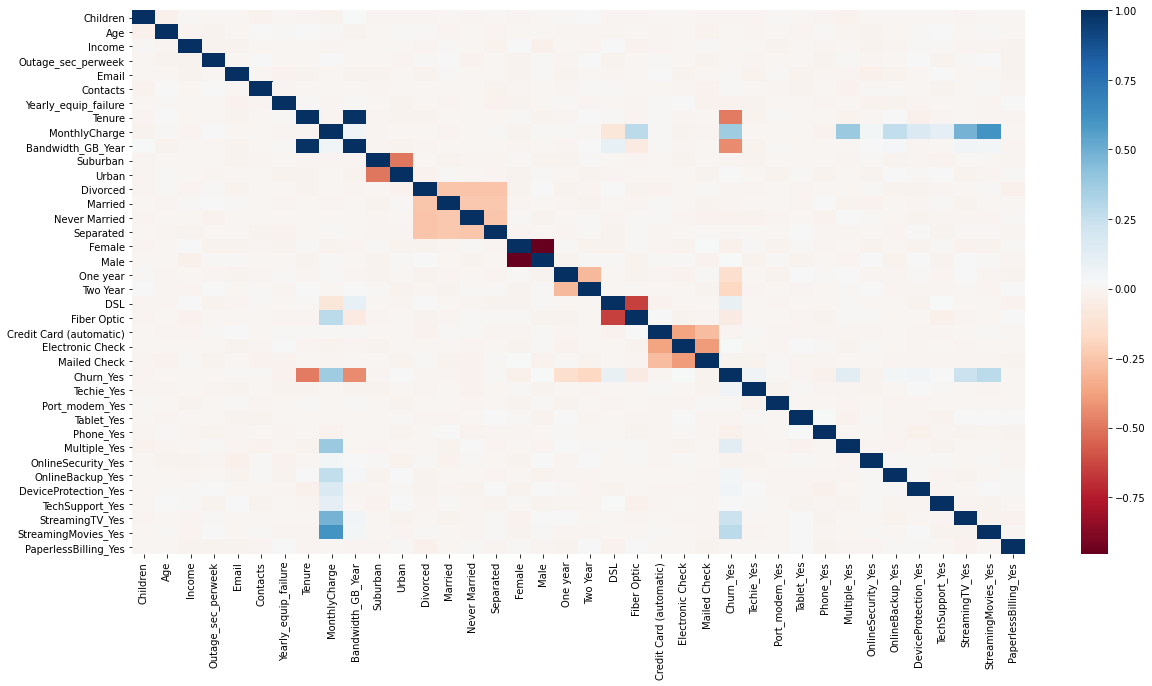

In [43]:
#heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [44]:
corr_df_before = final_df

# Adding constant to calculate VIF
X2 = sm.tools.add_constant(corr_df_before)


# Create the series to retrieve values
series_before = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)


# Display the series
print('DATA BEFORE')
print('-'*50)
display(series_before)



DATA BEFORE
--------------------------------------------------


const                        269.302647
Children                      57.531773
Age                           60.556408
Income                         1.002896
Outage_sec_perweek             1.003681
Email                          1.003624
Contacts                       1.003412
Yearly_equip_failure           1.003669
Tenure                     60791.245672
MonthlyCharge                223.139781
Bandwidth_GB_Year          61846.519771
Suburban                       1.337416
Urban                          1.338199
Divorced                       1.613492
Married                        1.575382
Never Married                  1.585006
Separated                      1.596505
Female                        12.847149
Male                          35.460916
One year                       1.190476
Two Year                       1.203843
DSL                          418.839487
Fiber Optic                   33.733179
Credit Card (automatic)        1.536408
Electronic Check               1.675449


In [45]:
#Calculating VIF again after dropping a predicor variable with higest VIF
corr_df_after = final_df.drop(['Bandwidth_GB_Year'], axis = 1)

X3 = sm.tools.add_constant(corr_df_after)

series_after = pd.Series([variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])], index=X3.columns)

print('DATA AFTER')
print('-'*50)
display(series_after)

DATA AFTER
--------------------------------------------------


const                      178.944121
Children                     1.003284
Age                          1.004306
Income                       1.002883
Outage_sec_perweek           1.003621
Email                        1.003620
Contacts                     1.003377
Yearly_equip_failure         1.003667
Tenure                       1.459289
MonthlyCharge               24.313824
Suburban                     1.336501
Urban                        1.337987
Divorced                     1.613492
Married                      1.575378
Never Married                1.584988
Separated                    1.596403
Female                      11.355948
Male                        11.360113
One year                     1.190449
Two Year                     1.203745
DSL                          2.210763
Fiber Optic                  5.199081
Credit Card (automatic)      1.536351
Electronic Check             1.675290
Mailed Check                 1.569234
Churn_Yes                    1.965101
Techie_Yes  

In [46]:
#Calculating VIF again after dropping the next predicor variable with high VIF
corr_df_after = final_df.drop(['Bandwidth_GB_Year', 'MonthlyCharge'], axis = 1)

X4 = sm.tools.add_constant(corr_df_after)

series_after = pd.Series([variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])], index=X4.columns)

print('DATA AFTER AFTER')
print('-'*50)
display(series_after)

DATA AFTER AFTER
--------------------------------------------------


const                      114.860859
Children                     1.003281
Age                          1.004263
Income                       1.002779
Outage_sec_perweek           1.003608
Email                        1.003619
Contacts                     1.003343
Yearly_equip_failure         1.003613
Tenure                       1.452254
Suburban                     1.336481
Urban                        1.337986
Divorced                     1.613367
Married                      1.575277
Never Married                1.584988
Separated                    1.596364
Female                      11.354064
Male                        11.359408
One year                     1.188001
Two Year                     1.201264
DSL                          1.741161
Fiber Optic                  1.721680
Credit Card (automatic)      1.536159
Electronic Check             1.675182
Mailed Check                 1.569224
Churn_Yes                    1.932522
Techie_Yes                   1.010323
Port_modem_Y

In [47]:
#Calculating VIF again after dropping another predicor variable with the highest VIF
corr_df_after = final_df.drop(['Bandwidth_GB_Year', 'MonthlyCharge', 'Male'], axis = 1)

X5 = sm.tools.add_constant(corr_df_after)

series_after = pd.Series([variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])], index=X5.columns)

print('DATA AFTER AFTER AFTER')
print('-'*50)
display(series_after)

DATA AFTER AFTER AFTER
--------------------------------------------------


const                      75.120011
Children                    1.003280
Age                         1.003891
Income                      1.002681
Outage_sec_perweek          1.003600
Email                       1.003522
Contacts                    1.003342
Yearly_equip_failure        1.003033
Tenure                      1.451881
Suburban                    1.336470
Urban                       1.337936
Divorced                    1.613212
Married                     1.575165
Never Married               1.584964
Separated                   1.596293
Female                      1.004141
One year                    1.188001
Two Year                    1.201212
DSL                         1.741151
Fiber Optic                 1.721677
Credit Card (automatic)     1.535990
Electronic Check            1.675134
Mailed Check                1.569141
Churn_Yes                   1.932145
Techie_Yes                  1.010266
Port_modem_Yes              1.001861
Tablet_Yes                  1.004685
P

In [48]:
# define our input variables and output variable
final_df = final_df.drop(['Bandwidth_GB_Year', 'MonthlyCharge', 'Male'], axis = 1)

X = final_df.drop('Churn_Yes', axis = 1)
Y = final_df[['Churn_Yes']]

# split it into test and train variables with 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Logistic Regression model object
regression_model = LogisticRegression(max_iter=500)

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=500)

In [49]:
#define our input and add the constant
X6 = sm.add_constant(X)

#create our initial Logit model
logit = sm.Logit(Y, X6)

#fit the data
result = logit.fit()

#print the data
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.221156
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9965
Method:                           MLE   Df Model:                           34
Date:                Mon, 13 Sep 2021   Pseudo R-squ.:                  0.6175
Time:                        23:50:03   Log-Likelihood:                -2211.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.9358      0.336     -8.746      0.000      -3.594   

In [50]:
#Re training the model removing all variables with a P value over 0.05
final_df = final_df.drop(['Children', 'Age', 'Income', 'Outage_sec_perweek', 
                    'Email', 'Contacts', 'Yearly_equip_failure', 'Suburban', 'Urban', 'Married', 'Never Married',
                    'Separated', 'Fiber Optic', 'Credit Card (automatic)', 'Mailed Check', 'Port_modem_Yes', 'Tablet_Yes', 
                    'OnlineSecurity_Yes'], axis = 1)

X = final_df.drop('Churn_Yes', axis = 1)
Y = final_df[['Churn_Yes']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LogisticRegression(max_iter=500)

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=500)

In [51]:
#define our input and add the constant
X7 = sm.add_constant(X)

#create our initial Logit model
logit = sm.Logit(Y, X7)

#fit the data
result = logit.fit()

#print the data
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.222146
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Mon, 13 Sep 2021   Pseudo R-squ.:                  0.6158
Time:                        23:50:04   Log-Likelihood:                -2221.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.8481      0.186    -15.284      0.000      -3.213      -2.483

In [52]:
#Re training the model removing another variable with a p-value over 0.05
final_df = final_df.drop(['Divorced'], axis = 1)

X = final_df.drop('Churn_Yes', axis = 1)
Y = final_df[['Churn_Yes']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LogisticRegression(max_iter=500)

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=500)

In [53]:
#define our input and add the constant
X8 = sm.add_constant(X)

#create our initial Logit model
logit = sm.Logit(Y, X8)

#fit the data
result = logit.fit()

#print the data
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.222260
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Mon, 13 Sep 2021   Pseudo R-squ.:                  0.6156
Time:                        23:50:04   Log-Likelihood:                -2222.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.8809      0.185    -15.559      0.000      -3.244      -2.518

In [54]:
#Find out our True Positive and True Negative
y_pred = regression_model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[1361   81]
 [ 118  440]]


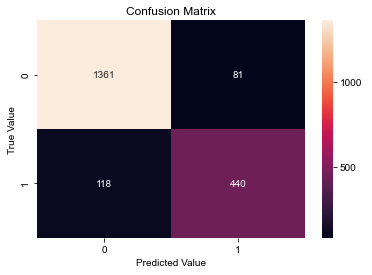

In [55]:
ax = sns.heatmap(cm, annot=True, fmt='g');
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Value')
ax.set_ylabel('True Value');
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
sns.set(font_scale=10)
plt.show()

In [56]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 10 predictions
y_predict[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [57]:
#Find out the accuracy of our model
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.9005


In [58]:
#Show our Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1442
           1       0.84      0.79      0.82       558

    accuracy                           0.90      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.90      0.90      0.90      2000



In [59]:
print(regression_model.intercept_)
print(regression_model.coef_)

[-2.81088134]
[[-0.10859528 -0.18835538 -3.20209792 -3.25857814  1.32297366  0.42308735
   1.07700844 -0.27892193  1.60240907  0.84767787  0.42459074  0.24570252
   2.84795587  3.37747843  0.13915469]]


In [60]:
#Predict if a customer who has a Tenure of 20 months, is a Female, has a month-to-month contract (One year and Two year are zero),
#has DSL for InternetService, does not pay with electronic check, is Techie, has Phone service, has Multiple lines,
#has OnlineBackup, has DeviceProtection, has TechSupport add-on,  has StreamingTV, has StreamingMovies, 
#and has PaperlessBilling
predict_sample1 = regression_model.predict([[20, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
print(predict_sample1)

[1]
